In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(train_targets)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3 

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
def build_model():
  model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse",
  metrics=["mae"])
  return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k

In [ ]:
num_epochs = 500
all_train_mae_histories = []
all_val_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(
    partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
  train_mae_history = history.history['mae']
  val_mae_history = history.history["val_mae"]

  all_train_mae_histories.append(train_mae_history)
  all_val_mae_histories.append(val_mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


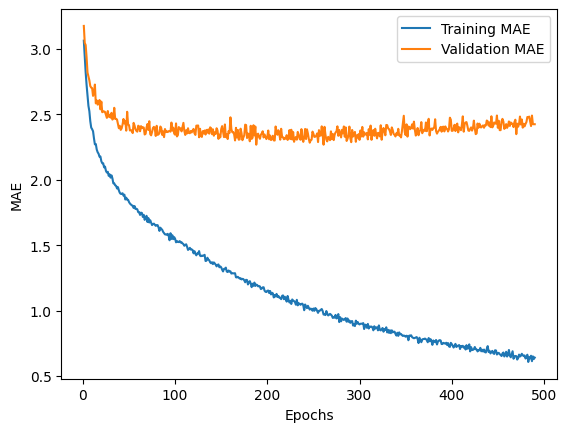

In [ ]:
average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

truncated_train_mae_history = average_train_mae_history[10:] ## Remove first 10 values
truncated_val_mae_history = average_val_mae_history[10:] ## Remove first 10 values

plt.plot(range(1, len(truncated_train_mae_history) + 1), truncated_train_mae_history, label = 'Training MAE')
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history, label = 'Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [ ]:
#130 epochs optimal, final Test & Train MAE using all train data. (2 hidden layers, 64 units each, batch_size=16)
model = build_model()
model.fit(train_data, train_targets,
epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mae_score = history.history["mae"][-1] #MAE from last epoch
print("Final Train MAE:",train_mae_score)
print("Test MAE:",test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 11.4647 - mae: 2.2488
Final Train MAE: 0.6920694708824158
Test MAE: 2.494541645050049


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


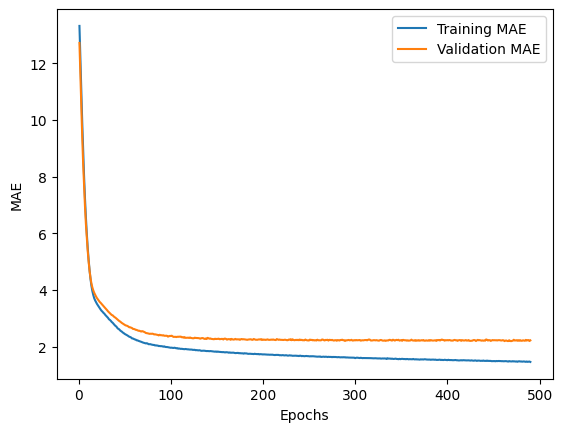

In [ ]:
#Finding optimal epochs for (1 hidden layers, 64 units each, batch_size=16)
def build_model():
  model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse",
  metrics=["mae"])
  return model
num_epochs = 500
all_train_mae_histories = []
all_val_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(
    partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
  train_mae_history = history.history['mae']
  val_mae_history = history.history["val_mae"]

  all_train_mae_histories.append(train_mae_history)
  all_val_mae_histories.append(val_mae_history)

average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

truncated_train_mae_history = average_train_mae_history[10:] ## Remove first 10 values
truncated_val_mae_history = average_val_mae_history[10:] ## Remove first 10 values

plt.plot(range(1, len(truncated_train_mae_history) + 1), truncated_train_mae_history, label = 'Training MAE')
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history, label = 'Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [ ]:
#300 epochs optimal, final Test & Train MAE using all train data. (1 hidden layers, 64 units each, batch_size=16)
model = build_model()
model.fit(train_data, train_targets,
epochs=300, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mae_score = history.history["mae"][-1] #MAE from last epoch
print("Final Train MAE:",train_mae_score)
print("Test MAE:",test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.9750 - mae: 2.4204
Final Train MAE: 1.4535707235336304
Test MAE: 2.6479740142822266


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


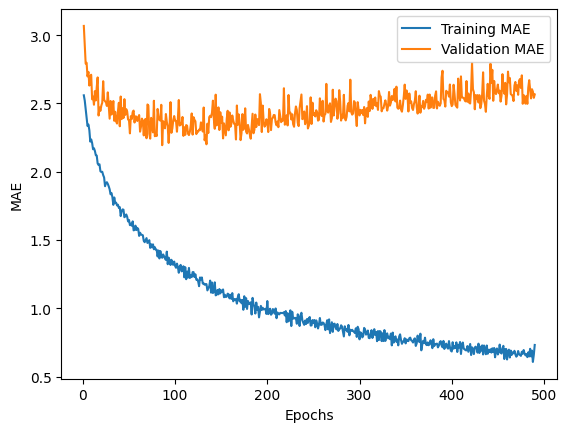

In [ ]:
#Finding optimal epochs for (3 hidden layers, 64 units each, batch_size=16)
def build_model():
  model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse",
  metrics=["mae"])
  return model
num_epochs = 500
all_train_mae_histories = []
all_val_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(
    partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
  train_mae_history = history.history['mae']
  val_mae_history = history.history["val_mae"]

  all_train_mae_histories.append(train_mae_history)
  all_val_mae_histories.append(val_mae_history)

average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

truncated_train_mae_history = average_train_mae_history[10:] ## Remove first 10 values
truncated_val_mae_history = average_val_mae_history[10:] ## Remove first 10 values

plt.plot(range(1, len(truncated_train_mae_history) + 1), truncated_train_mae_history, label = 'Training MAE')
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history, label = 'Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [ ]:
#100 epochs optimal, final Test & Train MAE using all train data. (3 hidden layers, 64 units each, batch_size=16)
model = build_model()
model.fit(train_data, train_targets,
epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mae_score = history.history["mae"][-1] #MAE from last epoch
print("Final Train MAE:",train_mae_score)
print("Test MAE:",test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.4159 - mae: 2.4463
Final Train MAE: 0.6733543872833252
Test MAE: 2.571143627166748


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


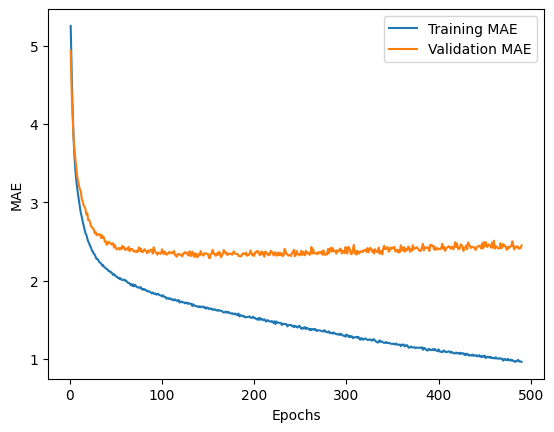

In [ ]:
#Finding optimal epochs for (2 hidden layers, 32 units each, batch_size=16)
def build_model():
  model = keras.Sequential([
  layers.Dense(32, activation="relu"),
  layers.Dense(32, activation="relu"),
  layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse",
  metrics=["mae"])
  return model
num_epochs = 500
all_train_mae_histories = []
all_val_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(
    partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
  train_mae_history = history.history['mae']
  val_mae_history = history.history["val_mae"]

  all_train_mae_histories.append(train_mae_history)
  all_val_mae_histories.append(val_mae_history)

average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

truncated_train_mae_history = average_train_mae_history[10:] ## Remove first 10 values
truncated_val_mae_history = average_val_mae_history[10:] ## Remove first 10 values

plt.plot(range(1, len(truncated_train_mae_history) + 1), truncated_train_mae_history, label = 'Training MAE')
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history, label = 'Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [ ]:
#150 epochs optimal, final Test & Train MAE using all train data. (2 hidden layers, 32 units each, batch_size=16)
model = build_model()
model.fit(train_data, train_targets,
epochs=150, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mae_score = history.history["mae"][-1] #MAE from last epoch
print("Final Train MAE:",train_mae_score)
print("Test MAE:",test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 13.2645 - mae: 2.4836
Final Train MAE: 0.9672817587852478
Test MAE: 2.6455421447753906


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


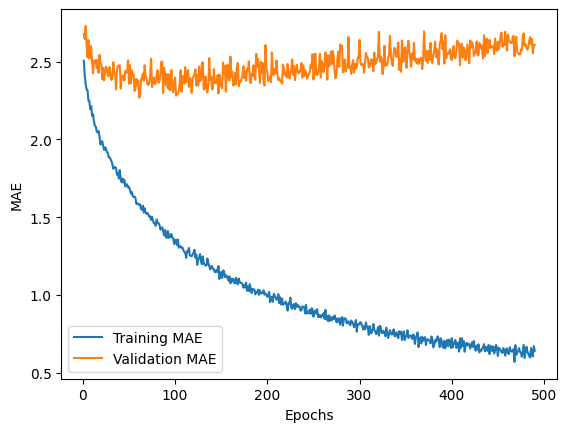

In [ ]:
#Finding optimal epochs for (2 hidden layers, 128 units each, batch_size=16)
def build_model():
  model = keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse",
  metrics=["mae"])
  return model
num_epochs = 500
all_train_mae_histories = []
all_val_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(
    partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
  train_mae_history = history.history['mae']
  val_mae_history = history.history["val_mae"]

  all_train_mae_histories.append(train_mae_history)
  all_val_mae_histories.append(val_mae_history)

average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

truncated_train_mae_history = average_train_mae_history[10:] ## Remove first 10 values
truncated_val_mae_history = average_val_mae_history[10:] ## Remove first 10 values

plt.plot(range(1, len(truncated_train_mae_history) + 1), truncated_train_mae_history, label = 'Training MAE')
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history, label = 'Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [ ]:
#120 epochs optimal, final Test & Train MAE using all train data. (2 hidden layers, 128 units each, batch_size=16)
model = build_model()
model.fit(train_data, train_targets,
epochs=120, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mae_score = history.history["mae"][-1] #MAE from last epoch
print("Final Train MAE:",train_mae_score)
print("Test MAE:",test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 17.5700 - mae: 3.0898
Final Train MAE: 0.6228426098823547
Test MAE: 3.3212764263153076


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


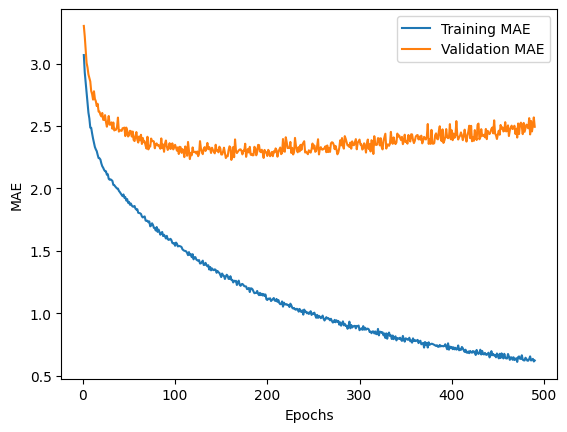

In [ ]:
#Finding optimal epochs for (2 hidden layers, 64 units each, batch_size=8)
def build_model():
  model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse",
  metrics=["mae"])
  return model
num_epochs = 500
all_train_mae_histories = []
all_val_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(
    partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
  train_mae_history = history.history['mae']
  val_mae_history = history.history["val_mae"]

  all_train_mae_histories.append(train_mae_history)
  all_val_mae_histories.append(val_mae_history)

average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

truncated_train_mae_history = average_train_mae_history[10:] ## Remove first 10 values
truncated_val_mae_history = average_val_mae_history[10:] ## Remove first 10 values

plt.plot(range(1, len(truncated_train_mae_history) + 1), truncated_train_mae_history, label = 'Training MAE')
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history, label = 'Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [ ]:
#85 epochs optimal, final Test & Train MAE using all train data. (2 hidden layers, 64 units each, batch_size=8)
model = build_model()
model.fit(train_data, train_targets,
epochs=85, batch_size=8, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mae_score = history.history["mae"][-1] #MAE from last epoch
print("Final Train MAE:",train_mae_score)
print("Test MAE:",test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.0461 - mae: 2.3781
Final Train MAE: 0.6445407867431641
Test MAE: 2.5789380073547363


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


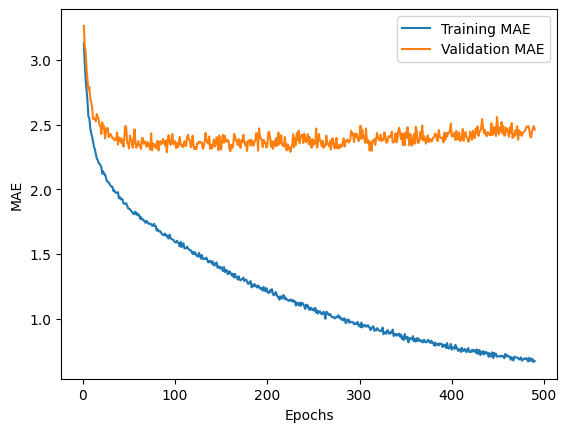

In [ ]:
#Finding optimal epochs for (2 hidden layers, 64 units each, batch_size=32)
def build_model():
  model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse",
  metrics=["mae"])
  return model
num_epochs = 500
all_train_mae_histories = []
all_val_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(
    partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
  train_mae_history = history.history['mae']
  val_mae_history = history.history["val_mae"]

  all_train_mae_histories.append(train_mae_history)
  all_val_mae_histories.append(val_mae_history)

average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

truncated_train_mae_history = average_train_mae_history[10:] ## Remove first 10 values
truncated_val_mae_history = average_val_mae_history[10:] ## Remove first 10 values

plt.plot(range(1, len(truncated_train_mae_history) + 1), truncated_train_mae_history, label = 'Training MAE')
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history, label = 'Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [ ]:
#200 epochs optimal, final Test & Train MAE using all train data. (2 hidden layers, 64 units each, batch_size=32)
model = build_model()
model.fit(train_data, train_targets,
epochs=200, batch_size=32, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mae_score = history.history["mae"][-1] #MAE from last epoch
print("Final Train MAE:",train_mae_score)
print("Test MAE:",test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.7664 - mae: 2.4968
Final Train MAE: 0.83919358253479
Test MAE: 2.5677127838134766
